<a href="https://colab.research.google.com/github/DivyaSadhana/COVID-19-Vaccines-ML-Model/blob/main/COVID19_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import re
import io


In [4]:
Dataset = pd.read_excel(r'/content/gdrive/My Drive/COVID_Mater_Tracker.xlsx')
Dataset.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,...,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,RPT_DATE,CAGE_YR,CAGE_MO
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,56.0,NaN
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,35.0,NaN
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,55.0,NaN
3,902464,Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Presyncope,...,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,42.0,NaN
4,902465,Dysgeusia,23.1,Oral pruritus,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Parosmia,...,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),NaN,60.0,NaN


#Convert Sympton Text into Lower Case

In [7]:
SYMPTOM_TEXT = Dataset['SYMPTOM_TEXT'].str.lower()
SYMPTOM_TEXT

0         patient experienced mild numbness traveling fr...
1                                              c/o headache
2         felt warm, hot and face and ears were red and ...
3         within 15 minutes progressive light-headedness...
4         pt felt wave come over body @ 1218 starting in...
                                ...                        
800187    three weeks after having gotten the pfizer cov...
800188                                          no symptoms
800189                                          no symptoms
800190    pt received proquad(mmrv) and pediatric pfizer...
800191    patient received monovalent vaccine on friday,...
Name: SYMPTOM_TEXT, Length: 800192, dtype: object

# Create key words for Heart related problems

In [9]:
Cardiac_Keywords =  '|'.join(['cardiac','cardio', 'heart','atrial','angina', 'tachycard', 'coronary', 'chest', 'myocardia', 'ischemi'])

# Detect existance of heart related problems in each row of symptoms text description for all patients

In [10]:
Scope_for_Cardiac_Disease = Dataset['SYMPTOM_TEXT'].str.contains(Cardiac_Keywords)
print(Scope_for_Cardiac_Disease)

0         False
1         False
2         False
3         False
4         False
          ...  
800187    False
800188    False
800189    False
800190    False
800191    False
Name: SYMPTOM_TEXT, Length: 800192, dtype: object


#Convert Boolean (True/False) into Integer (1/0) to facilitate ML model prediction

In [11]:
Scope_for_Cardiac_Disease  = Scope_for_Cardiac_Disease.replace({True: 1, False: 0})
Scope_for_Cardiac_Disease

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
800187    0.0
800188    0.0
800189    0.0
800190    0.0
800191    0.0
Name: SYMPTOM_TEXT, Length: 800192, dtype: float64

In [13]:
! pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt


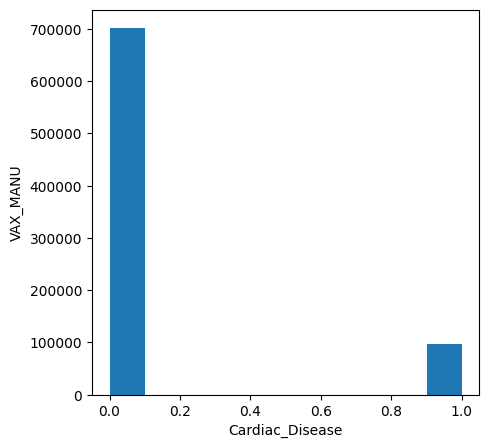

In [15]:

x_axis = Dataset['Scope_for_Cardiac_Disease']
y_axis = Dataset['VAX_MANU']
plt.figure(figsize=(5,5))
plt.hist(x_axis)
plt.xlabel('Cardiac_Disease')
plt.ylabel('VAX_MANU')

plt.show()

In [ ]:
! pip install seaborn
import seaborn as sns


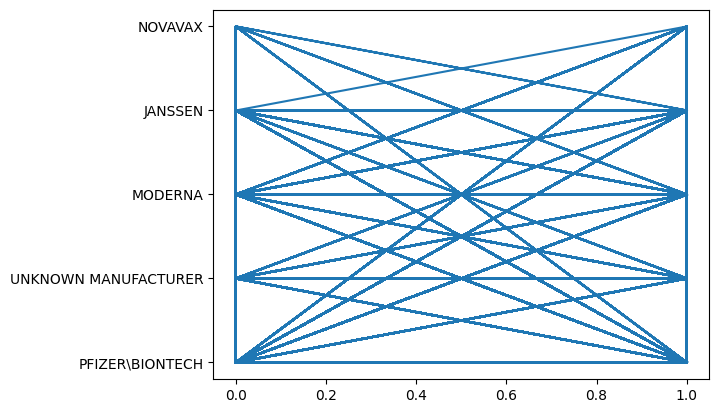

In [16]:
x=Dataset['Scope_for_Cardiac_Disease']
y=Dataset['VAX_MANU']

plt.plot(x,y)
plt.show()

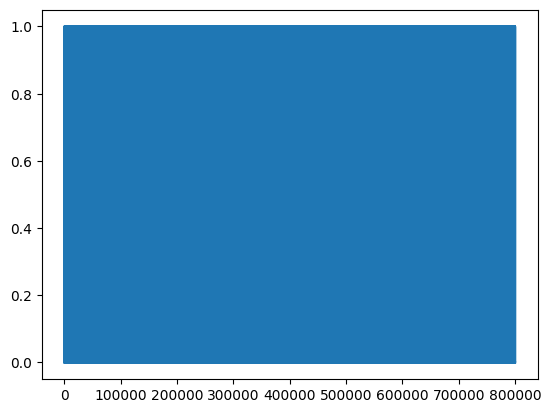

In [17]:
x=Dataset['Scope_for_Cardiac_Disease']
plt.plot(x)
plt.show()